### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [46]:
data = pd.read_csv('data/coupons.csv')
#data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [47]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [48]:
columns = pd.DataFrame(list(data.columns.values[1:]))
#columns

data_types = pd.DataFrame(data.dtypes, columns=['Data Type'])
#data_types

data_count = pd.DataFrame(data.count(), columns=['Count'])
#data_count

unique_value_counts = pd.DataFrame(columns=['Unique Values'])
for v in list(data.columns.values):
    unique_value_counts.loc[v] = [data[v].nunique()]
    #print(unique_value_counts.loc[v])

missing_data_counts = pd.DataFrame(data.isnull().sum(), columns=['Missing Values'])
data_quality_report = data_types.join(data_count).join(unique_value_counts).join(missing_data_counts)
print('Data Quality Report')
data_quality_report

Data Quality Report


,Data Type,Count,Unique Values,Missing Values
destination,object,12684,3,0
passanger,object,12684,4,0
weather,object,12684,3,0
temperature,int64,12684,3,0
time,object,12684,5,0
coupon,object,12684,5,0
expiration,object,12684,2,0
gender,object,12684,2,0
age,object,12684,8,0
maritalStatus,object,12684,5,0


3. Decide what to do about your missing data -- drop, replace, other...

In [49]:
#Replace catgorical data with null values with 'not_specified'
data['Bar'] = data['Bar'].fillna('not_specified')
print(data.query('Bar == "not_specified"').shape)

data['CoffeeHouse'] = data['CoffeeHouse'].fillna('not_specified')
print(data.query('CoffeeHouse == "not_specified"').shape)

data['CarryAway'] = data['CarryAway'].fillna('not_specified')
print(data.query('CarryAway == "not_specified"').shape)

data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('not_specified')
print(data.query('RestaurantLessThan20 == "not_specified"').shape)

data['Restaurant20To50'] = data['Restaurant20To50'].fillna('not_specified')
print(data.query('Restaurant20To50 == "not_specified"').shape)

#Drop car column as it has too many missing values
data2 = data.drop('car', axis=1)
data2.info()

(107, 26)
(217, 26)
(151, 26)
(130, 26)
(189, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null

4. What proportion of the total observations chose to accept the coupon?



Y
1    7210
0    5474
Name: count, dtype: int64


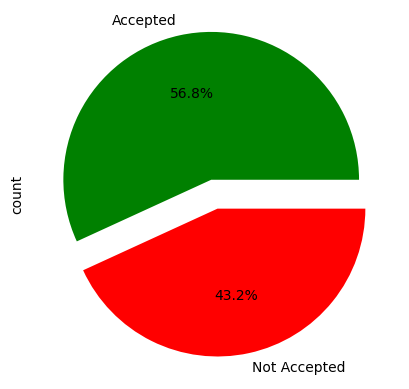

In [50]:
data2['Y'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','r'], labels=['Accepted', 'Not Accepted'])
print(data2['Y'].value_counts())

5. Use a bar plot to visualize the `coupon` column.

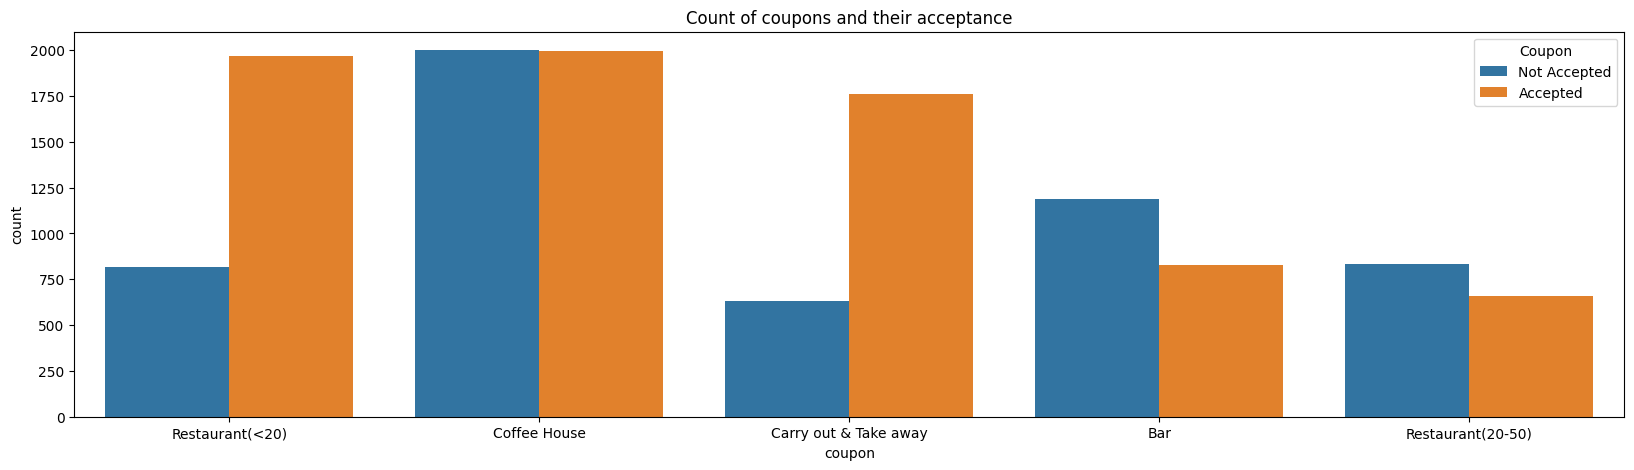

In [51]:
plt.figure(figsize=(20,5))
plt.title('Count of coupons and their acceptance')
sns.countplot(data=data2,x=data2['coupon'],hue=data2['Y']).legend(title='Coupon', loc='upper right', labels=['Not Accepted', 'Accepted'])

6. Use a histogram to visualize the temperature column.

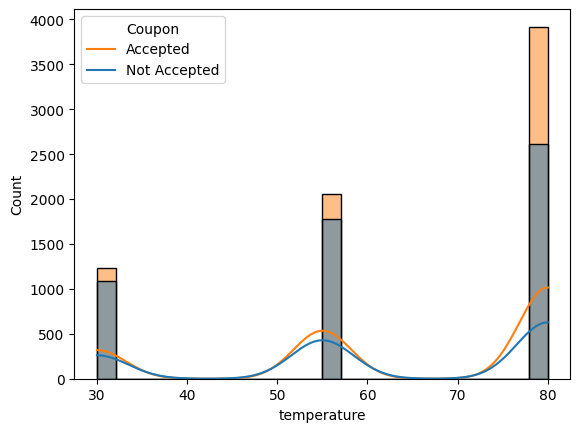

In [52]:
sns.histplot(data=data2,x=data2['temperature'],hue='Y',kde=True).legend(title='Coupon', loc='upper left', labels=['Accepted', 'Not Accepted'])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [121]:
data3 = data2.query('coupon == "Bar"')
data3.shape

(2017, 25)

2. What proportion of bar coupons were accepted?


Y
0    1177
1     819
Name: count, dtype: int64


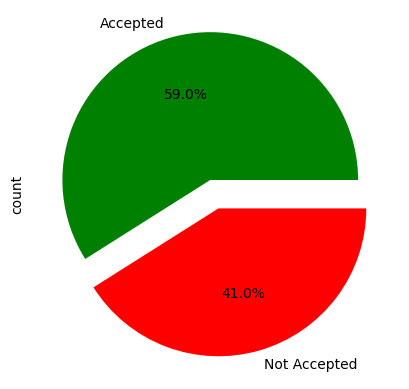

In [117]:
data3['Y'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','r'], labels=['Accepted', 'Not Accepted'])
print(data3['Y'].value_counts())

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


<Axes: title={'center': 'Drivers who visit bars more than 4 times a month\nacceptance rate'}, ylabel='count'>

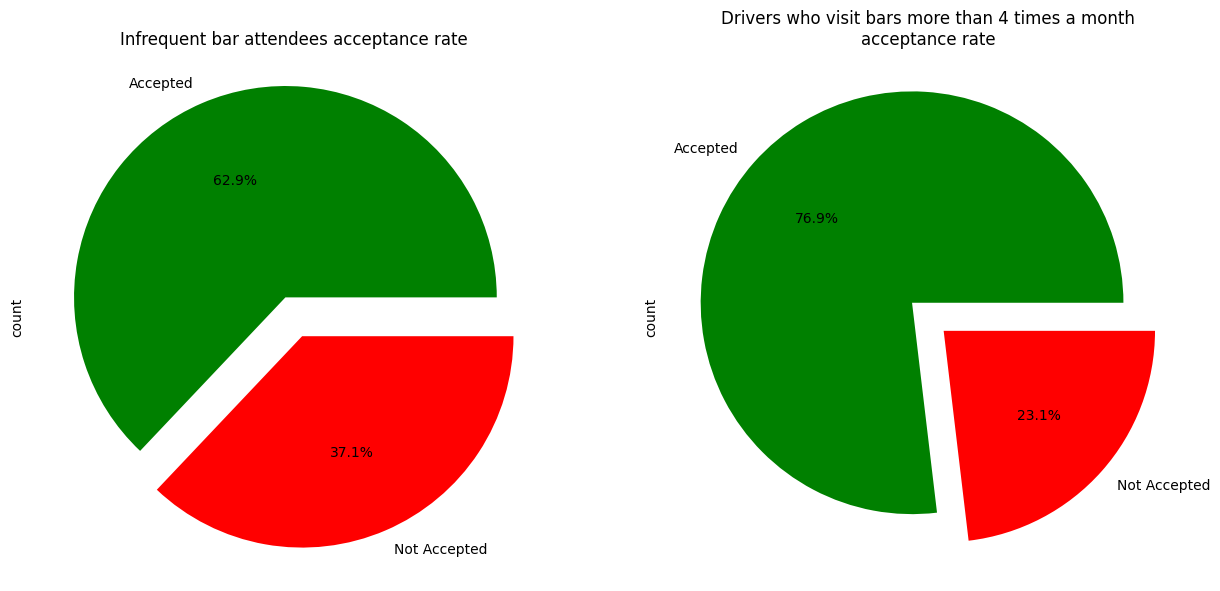

In [122]:
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.title('Infrequent bar attendees acceptance rate')
data4 = data3.query('(Bar != "not_specified") and Bar == "never" or Bar == "less1" or Bar == "1~3"')
data4['Y'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','r'], labels=['Accepted', 'Not Accepted'])
#data4.shape

plt.subplot(122)
plt.title('Drivers who visit bars more than 4 times a month' + '\n' + 'acceptance rate')
data4 = data3.query('(Bar != "not_specified") and Bar == "4~8" or Bar == "gt8"')
data4['Y'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','r'], labels=['Accepted', 'Not Accepted'])

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


<Axes: title={'center': 'All other drivers bar attendees acceptance rate'}, ylabel='count'>

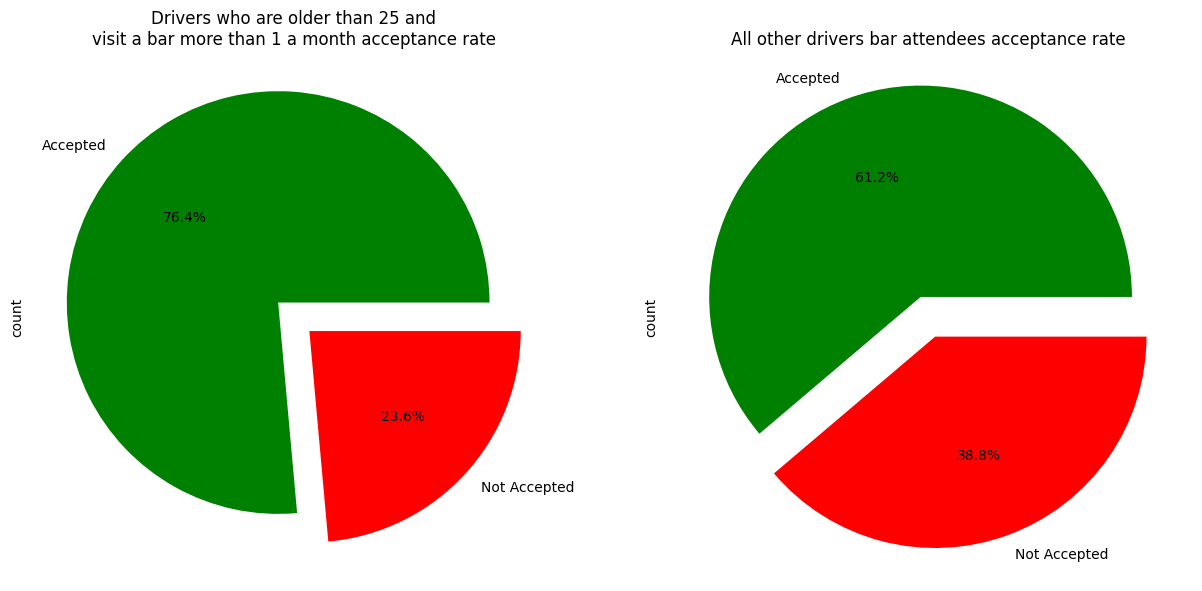

In [123]:
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.title('Drivers who are older than 25 and' + '\n' + 'visit a bar more than 1 a month acceptance rate')
data4 = data3.query('(Bar != "not_specified") and (Bar == "4~8" or Bar == "gt8") and (age > "25")')
data4['Y'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','r'], labels=['Accepted', 'Not Accepted'])
#data4.shape

plt.subplot(122)
plt.title('All other drivers bar attendees acceptance rate')
data4 = data3.query('(Bar != "not_specified") and (Bar == "never" or Bar == "less1") and (age < "25")')
data4['Y'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','r'], labels=['Accepted', 'Not Accepted'])

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


<Axes: title={'center': 'All other drivers bar attendees acceptance rate'}, ylabel='count'>

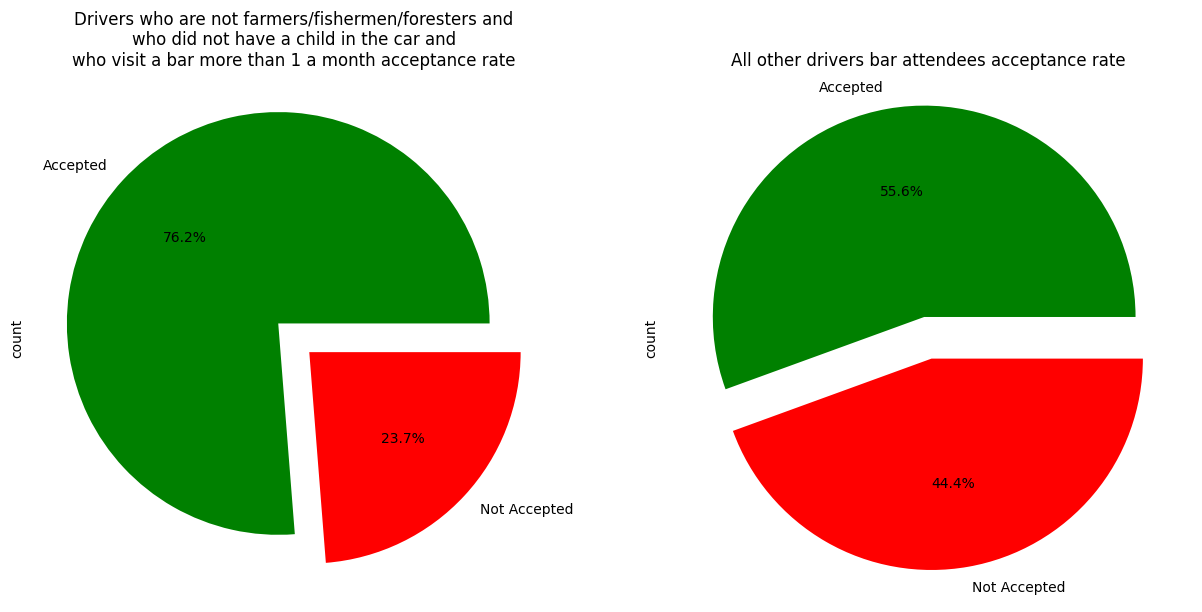

In [124]:
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.title('Drivers who are not farmers/fishermen/foresters and' + '\n' + 'who did not have a child in the car and' + '\n' + 'who visit a bar more than 1 a month acceptance rate')
data4 = data3.query('(Bar != "not_specified") and (Bar == "4~8" or Bar == "gt8") and (has_children != 1) and (occupation != "Farming Fishing & Forestry")')
data4['Y'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','r'], labels=['Accepted', 'Not Accepted'])
#data4.shape

plt.subplot(122)
plt.title('All other drivers bar attendees acceptance rate')
data4 = data3.query('(Bar != "not_specified") and (Bar == "never" or Bar == "less1") and (has_children == 1) and (occupation == "Farming Fishing & Forestry")')
data4['Y'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','r'], labels=['Accepted', 'Not Accepted'])

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



<Axes: title={'center': 'All other drivers acceptance rate'}, ylabel='count'>

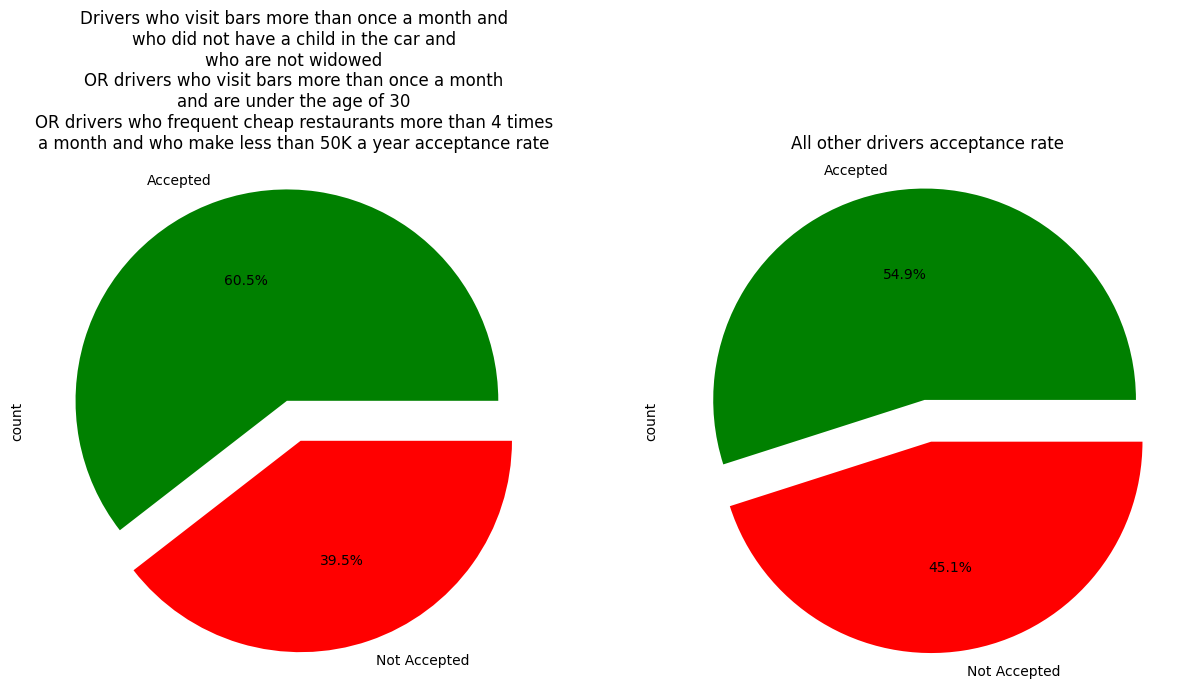

In [125]:
data3 = data2.drop(['CoffeeHouse', 'CarryAway'], axis=1).query('Bar != "not_specified"')
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.title('Drivers who visit bars more than once a month and' + '\n' + 'who did not have a child in the car and' + '\n' + 'who are not widowed' + '\n' + 'OR drivers who visit bars more than once a month' + '\n' + 'and are under the age of 30' + '\n' + 'OR drivers who frequent cheap restaurants more than 4 times' + '\n' + 'a month and who make less than 50K a year acceptance rate')
data4 = data3.query('((Bar != "not_specified") and (Bar == "4~8" or Bar == "gt8") and (has_children != 1) and (maritalStatus != "Widowed")) or ((Bar == "4~8" or Bar == "gt8") and (age < "30")) or ((RestaurantLessThan20 == "4~8" or RestaurantLessThan20 == "gt8") and (income == "$37500 - $49999" or income == "$12500 - $24999" or income == "Less than $12500" or income == "$25000 - $37499"))')
data4['Y'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','r'], labels=['Accepted', 'Not Accepted'])
#data4.shape

plt.subplot(122)
plt.title('All other drivers acceptance rate')
data4 = data3.query('((Bar != "not_specified") and (Bar == "never" or Bar == "less1") and (has_children == 1) and (maritalStatus == "Widowed")) or ((Bar == "1~3" or Bar == "less1" or Bar == "never") and (age > "30")) or ((RestaurantLessThan20 == "1~3" or RestaurantLessThan20 == "less1" or RestaurantLessThan20 == "never") and (income == "$50000 - $62499" or income == "$62500 - $74999" or income == "$75000 - $87499" or income == "$87500 - $99999" or income == "$100000 or More"))')
data4['Y'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','r'], labels=['Accepted', 'Not Accepted'])

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers who accepted coupons to visit a near by bar share the following characteristics:
- They tend to visit bars more than once a month
- They tend to fall between the ages of 25 and 30
- They tend not to have children riding with them in the car upon acceptance
- They tend to not be Fishermen, Farmers nor Foresters


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [126]:
data5 = data2.query('coupon == "Carry out & Take away"')
data5.shape

(2393, 25)

<Axes: title={'center': 'Drivers who order carry out more than 4 times a month\nacceptance rate'}, ylabel='count'>

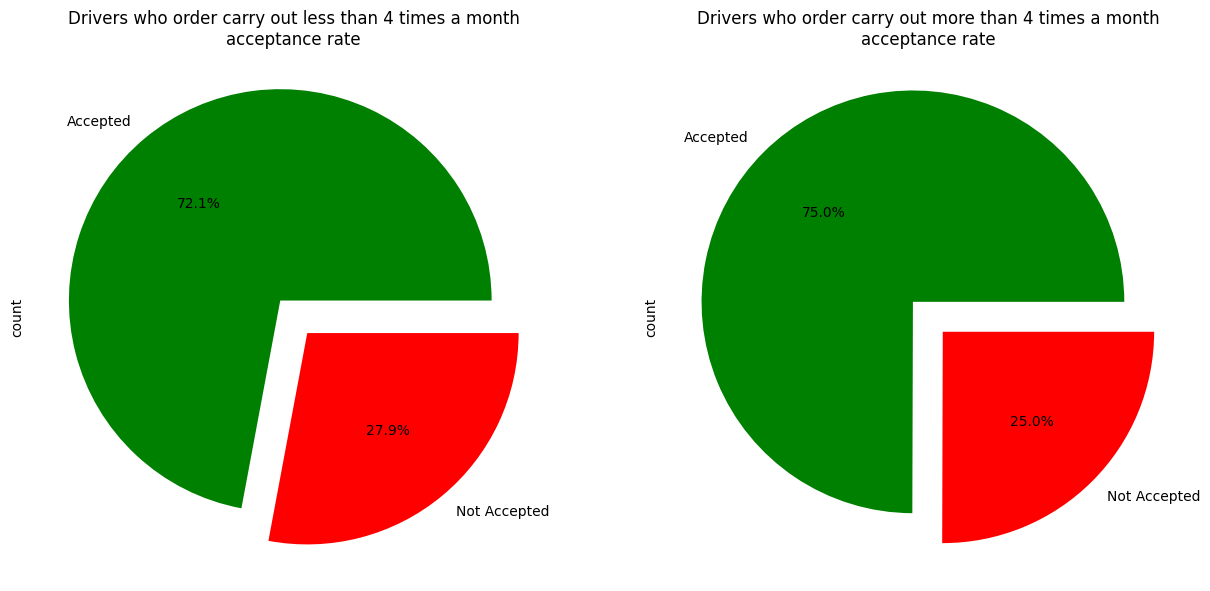

In [127]:
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.title('Drivers who order carry out less than 4 times a month' + '\n' + 'acceptance rate')
data6 = data5.query('(CarryAway != "not_specified") and (CarryAway == "never" or CarryAway == "less1" or CarryAway == "1~3")')
data6['Y'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','r'], labels=['Accepted', 'Not Accepted'])
#data4.shape

plt.subplot(122)
plt.title('Drivers who order carry out more than 4 times a month' + '\n' + 'acceptance rate')
data6 = data5.query('(CarryAway != "not_specified") and (CarryAway == "4~8" or CarryAway == "gt8")')
data6['Y'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','r'], labels=['Accepted', 'Not Accepted'])

<Axes: title={'center': 'Drivers who order carry more than 4 times a month\n and make less than $50K per year acceptance rate'}, ylabel='count'>

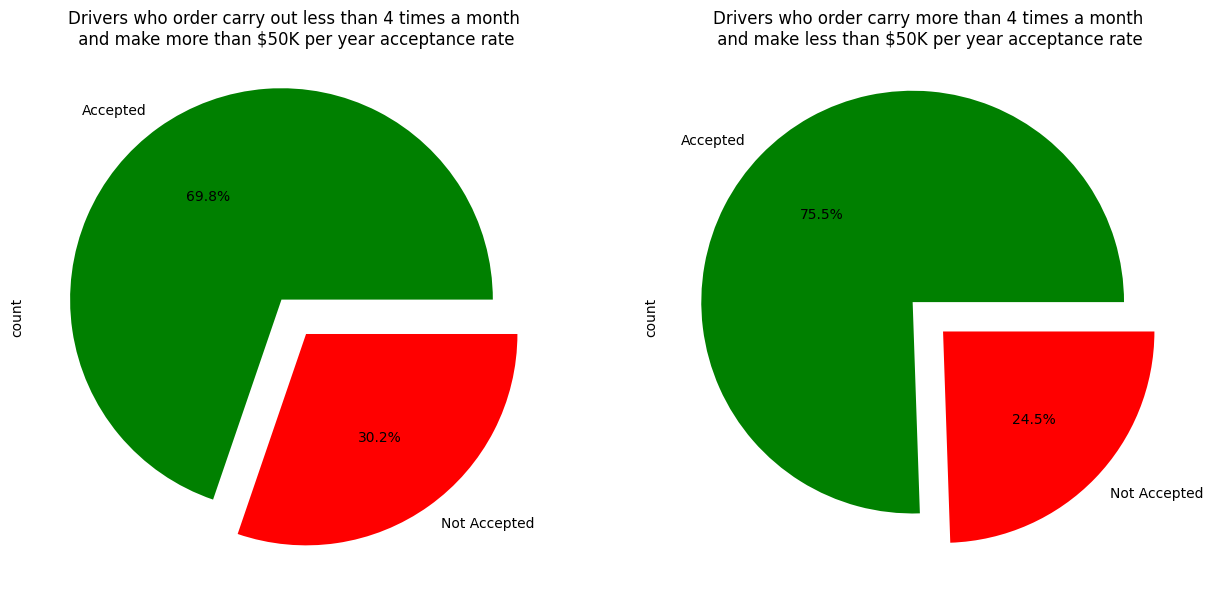

In [141]:
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.title('Drivers who order carry out less than 4 times a month' + '\n' + ' and make more than $50K per year acceptance rate')
data6 = data5.query('(CarryAway != "not_specified") and (CarryAway == "never" or CarryAway == "less1" or CarryAway == "1~3") and (income == "$50000 - $62499" or income == "$62500 - $74999" or income == "$75000 - $87499" or income == "$87500 - $99999" or income == "$100000 or More")')
data6['Y'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','r'], labels=['Accepted', 'Not Accepted'])
#data4.shape

plt.subplot(122)
plt.title('Drivers who order carry more than 4 times a month' + '\n' + ' and make less than $50K per year acceptance rate')
data6 = data5.query('(CarryAway != "not_specified") and (CarryAway == "4~8" or CarryAway == "gt8") and (income == "$37500 - $49999" or income == "$12500 - $24999" or income == "Less than $12500" or income == "$25000 - $37499")')
data6['Y'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','r'], labels=['Accepted', 'Not Accepted'])

<Axes: title={'center': 'Drivers who are widowed'}, ylabel='count'>

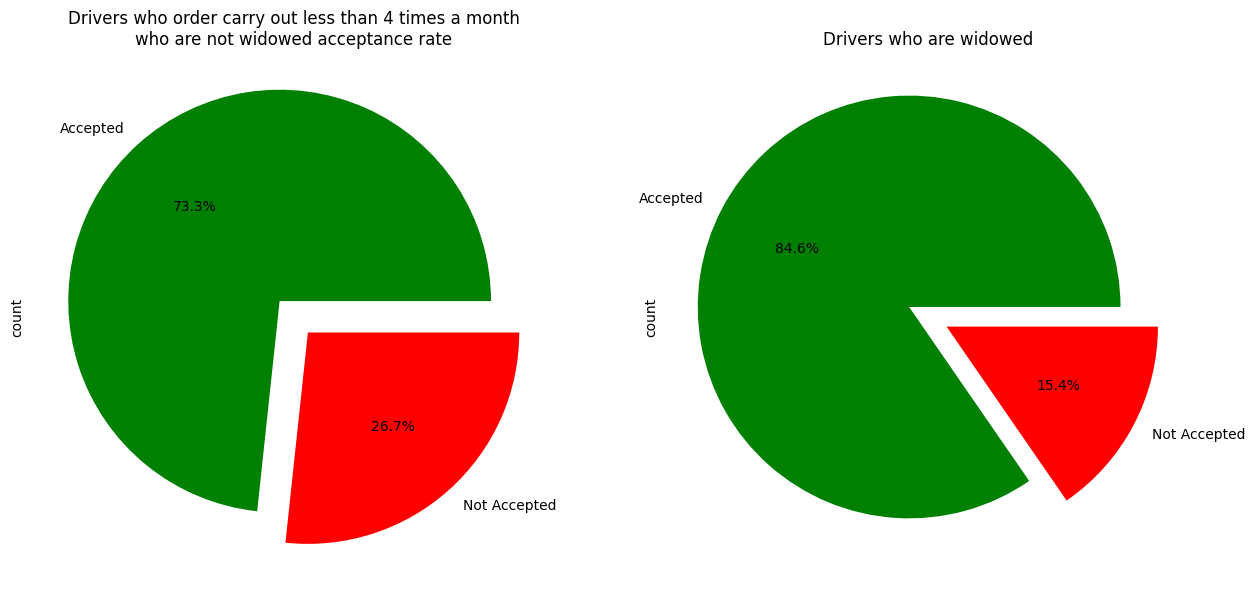

In [133]:
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.title('Drivers who are not widowed acceptance rate')
data6 = data5.query('(CarryAway != "not_specified") and (maritalStatus != "Widowed")')
data6['Y'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','r'], labels=['Accepted', 'Not Accepted'])
#data4.shape

plt.subplot(122)
plt.title('Drivers who are widowed')
data6 = data5.query('(CarryAway != "not_specified") and (maritalStatus == "Widowed")')
data6['Y'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','r'], labels=['Accepted', 'Not Accepted'])

<Axes: title={'center': 'Drivers who order carry out more than 4 times a month\nand are married and have a children with\nthem in the car acceptance rate'}, ylabel='count'>

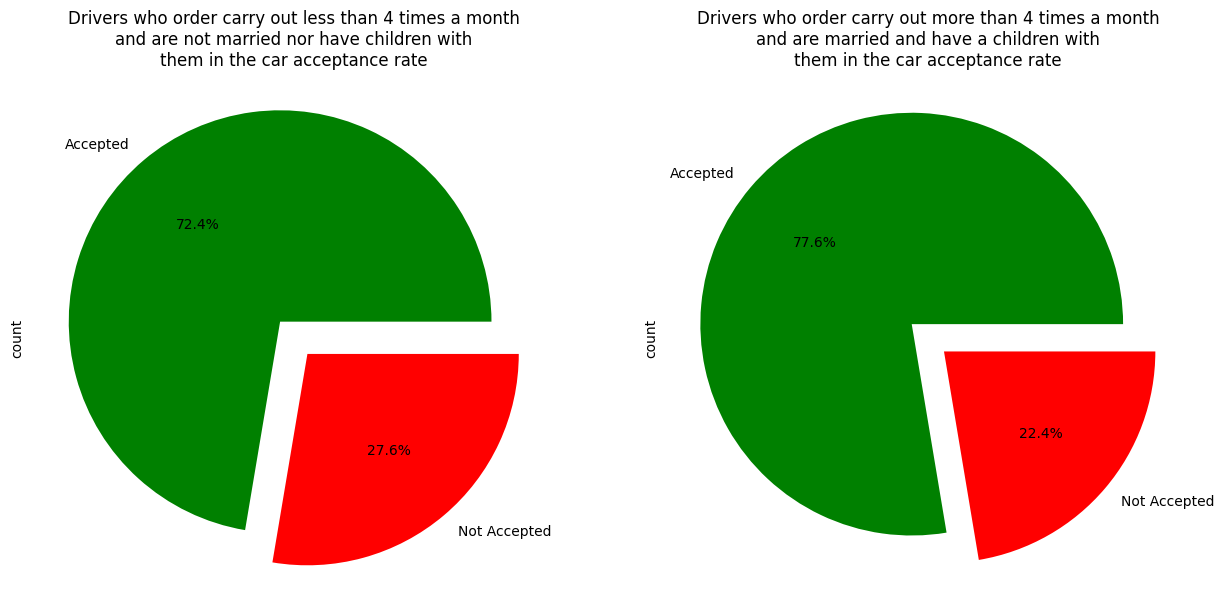

In [142]:
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.title('Drivers who order carry out less than 4 times a month' + '\n' + 'and are not married nor have children with' + '\n' + 'them in the car acceptance rate')
data6 = data5.query('(CarryAway != "not_specified") and (CarryAway == "never" or CarryAway == "less1" or CarryAway == "1~3") and (maritalStatus != "Married partner") and (has_children == 0)')
data6['Y'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','r'], labels=['Accepted', 'Not Accepted'])
#data4.shape

plt.subplot(122)
plt.title('Drivers who order carry out more than 4 times a month' + '\n' + 'and are married and have a children with' + '\n' + 'them in the car acceptance rate')
data6 = data5.query('(CarryAway != "not_specified") and (CarryAway == "4~8" or CarryAway == "gt8") and (maritalStatus == "Married partner") and (has_children == 1)')
data6['Y'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','r'], labels=['Accepted', 'Not Accepted'])

<Axes: title={'center': "Drivers who do not have at least a bachelor's degree acceptance rate"}, ylabel='count'>

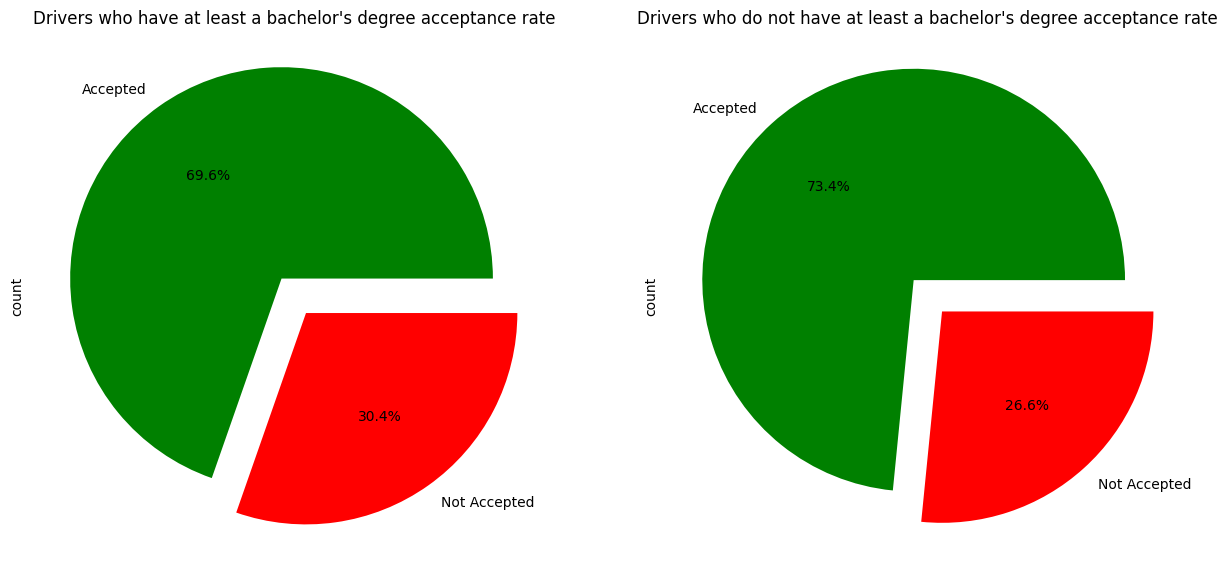

In [143]:
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.title('Drivers who have at least a bachelor\'s degree acceptance rate')
data6 = data5.query('(CarryAway != "not_specified") and (education == "Bachelors degree" or education == "Graduate degree (Masters or Doctorate)")')
data6['Y'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','r'], labels=['Accepted', 'Not Accepted'])
#data4.shape

plt.subplot(122)
plt.title('Drivers who do not have at least a bachelor\'s degree acceptance rate')
data6 = data5.query('(CarryAway != "not_specified") and (education != "Bachelors degree" or education != "Graduate degree (Masters or Doctorate)")')
data6['Y'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','r'], labels=['Accepted', 'Not Accepted'])

Drivers who accepted coupons for carry out from a near by restaurant share the following characteristics:

- Most of them are Widowed
- They tend to not have a bachelor's degree
- They tend to make less than $50K per year and they tend to order carry out more than 4 times a month
- If they are married and they order carry out more than 4 times a month, they tend to accept the coupon when they have a child in the care riding with them